 ### Building a regression model that tries to predict the estimated cumulative 6 month revenue from a new customer

#A): investigate the data using graphs, tableau, excel, python, sql, whatever you want, and 
#B): to try to build a regression model to predict how much a new customer will spend in their first six months. 
#Based on 
#A), you are also free to go in other directions or build different models in addition to 
#B) above, with the caveat that your preliminary presentation and slides are due on FRIDAY.  Make it work.

In [22]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import statsmodels.formula.api as smf
import datetime as dt
import seaborn as sns

In [2]:
order = pd.read_csv('C:/Users/vagne/Desktop/Statistics/olist_orders_dataset.csv')
customer = pd.read_csv('C:/Users/vagne/Desktop/Statistics/olist_customers_dataset.csv')
payment = pd.read_csv('C:/Users/vagne/Desktop/Statistics/olist_order_payments_dataset.csv')

In [3]:
ord_paym = pd.merge (order, customer)
all_data = pd.merge (ord_paym, payment)

In [4]:
all_data.shape

(103886, 16)

In [5]:
all_data.dropna (inplace = True)

In [6]:
all_data['order_approved_at'] = pd.to_datetime(all_data['order_approved_at'])

In [7]:
all_data['year_order'] = all_data['order_approved_at'].dt.year

In [8]:
all_data['month_order'] = all_data['order_approved_at'].dt.month

In [9]:
all_data['customer_unique_id'] = all_data['customer_unique_id'].astype(str)

In [10]:
customer_pay = all_data.groupby('customer_unique_id').sum()['payment_value'].reset_index()
customer_pay = customer_pay.rename(columns = {'payment_value' : 'total'})
customer_pay

,customer_unique_id,total
0,0000366f3b9a7992bf8c76cfdf3221e2,141.90
1,0000b849f77a49e4a4ce2b2a4ca5be3f,27.19
2,0000f46a3911fa3c0805444483337064,86.22
3,0000f6ccb0745a6a4b88665a16c9f078,43.62
4,0004aac84e0df4da2b147fca70cf8255,196.89
5,0004bd2a26a76fe21f786e4fbd80607f,166.98
6,00050ab1314c0e55a6ca13cf7181fecf,35.38
7,00053a61a98854899e70ed204dd4bafe,419.18
8,0005e1862207bf6ccc02e4228effd9a0,150.12
9,0005ef4cd20d2893f0d9fbd94d3c0d97,129.76


In [11]:
all_data1 = pd.merge (all_data, customer_pay)
all_data1.head(5)

,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date,customer_unique_id,customer_zip_code_prefix,customer_city,customer_state,payment_sequential,payment_type,payment_installments,payment_value,year_order,month_order,total
0,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02 10:56:33,2017-10-02 11:07:15,2017-10-04 19:55:00,2017-10-10 21:25:13,2017-10-18 00:00:00,7c396fd4830fd04220f754e42b4e5bff,3149,sao paulo,SP,1,credit_card,1,18.12,2017,10,82.82
1,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02 10:56:33,2017-10-02 11:07:15,2017-10-04 19:55:00,2017-10-10 21:25:13,2017-10-18 00:00:00,7c396fd4830fd04220f754e42b4e5bff,3149,sao paulo,SP,3,voucher,1,2.00,2017,10,82.82
2,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02 10:56:33,2017-10-02 11:07:15,2017-10-04 19:55:00,2017-10-10 21:25:13,2017-10-18 00:00:00,7c396fd4830fd04220f754e42b4e5bff,3149,sao paulo,SP,2,voucher,1,18.59,2017,10,82.82
3,69923a4e07ce446644394df37a710286,31f31efcb333fcbad2b1371c8cf0fa84,delivered,2017-09-04 11:26:38,2017-09-04 11:43:25,2017-09-04 21:22:15,2017-09-05 19:20:20,2017-09-15 00:00:00,7c396fd4830fd04220f754e42b4e5bff,3149,sao paulo,SP,1,credit_card,1,44.11,2017,9,82.82
4,53cdb2fc8bc7dce0b6741e2150273451,b0830fb4747a6c6d20dea0b8c802d7ef,delivered,2018-07-24 20:41:37,2018-07-26 03:24:27,2018-07-26 14:31:00,2018-08-07 15:27:45,2018-08-13 00:00:00,af07308b275d755c9edb36a90c618231,47813,barreiras,BA,1,boleto,1,141.46,2018,7,141.46


In [12]:
see_2017 = all_data1[all_data1['year_order'] == 2017]
see_2017.head()

,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date,customer_unique_id,customer_zip_code_prefix,customer_city,customer_state,payment_sequential,payment_type,payment_installments,payment_value,year_order,month_order,total
0,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02 10:56:33,2017-10-02 11:07:15,2017-10-04 19:55:00,2017-10-10 21:25:13,2017-10-18 00:00:00,7c396fd4830fd04220f754e42b4e5bff,3149,sao paulo,SP,1,credit_card,1,18.12,2017,10,82.82
1,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02 10:56:33,2017-10-02 11:07:15,2017-10-04 19:55:00,2017-10-10 21:25:13,2017-10-18 00:00:00,7c396fd4830fd04220f754e42b4e5bff,3149,sao paulo,SP,3,voucher,1,2.00,2017,10,82.82
2,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02 10:56:33,2017-10-02 11:07:15,2017-10-04 19:55:00,2017-10-10 21:25:13,2017-10-18 00:00:00,7c396fd4830fd04220f754e42b4e5bff,3149,sao paulo,SP,2,voucher,1,18.59,2017,10,82.82
3,69923a4e07ce446644394df37a710286,31f31efcb333fcbad2b1371c8cf0fa84,delivered,2017-09-04 11:26:38,2017-09-04 11:43:25,2017-09-04 21:22:15,2017-09-05 19:20:20,2017-09-15 00:00:00,7c396fd4830fd04220f754e42b4e5bff,3149,sao paulo,SP,1,credit_card,1,44.11,2017,9,82.82
6,949d5b44dbf5de918fe9c16f97b45f8a,f88197465ea7920adcdbec7375364d82,delivered,2017-11-18 19:28:06,2017-11-18 19:45:59,2017-11-22 13:39:59,2017-12-02 00:28:42,2017-12-15 00:00:00,7c142cf63193a1473d2e66489a9ae977,59296,sao goncalo do amarante,RN,1,credit_card,1,72.20,2017,11,72.20


In [13]:
test_year = all_data1['month_order'].unique()
test_year

array([10,  9,  7,  8, 11,  2,  5,  1,  6,  3, 12,  4], dtype=int64)

In [14]:
all_data1.dropna ()
all_data1.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 100739 entries, 0 to 100738
Data columns (total 19 columns):
order_id                         100739 non-null object
customer_id                      100739 non-null object
order_status                     100739 non-null object
order_purchase_timestamp         100739 non-null object
order_approved_at                100739 non-null datetime64[ns]
order_delivered_carrier_date     100739 non-null object
order_delivered_customer_date    100739 non-null object
order_estimated_delivery_date    100739 non-null object
customer_unique_id               100739 non-null object
customer_zip_code_prefix         100739 non-null int64
customer_city                    100739 non-null object
customer_state                   100739 non-null object
payment_sequential               100739 non-null int64
payment_type                     100739 non-null object
payment_installments             100739 non-null int64
payment_value                    100739 non-

In [127]:
linear_model = smf.ols(formula = 'total ~ order_status + month_order + year_order + payment_sequential + payment_installments + payment_type', data = all_data1)
fitted_model = linear_model.fit()
fitted_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  total   R-squared:                       0.103
Model:                            OLS   Adj. R-squared:                  0.103
Method:                 Least Squares   F-statistic:                     1444.
Date:                Tue, 03 Dec 2019   Prob (F-statistic):               0.00
Time:                        14:27:15   Log-Likelihood:            -6.8685e+05
No. Observations:              100739   AIC:                         1.374e+06
Df Residuals:                  100730   BIC:                         1.374e+06
Df Model:                           8                                         
Covariance Type:            nonrobust                                         
===============================================================================================
                                  coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------------
Intercept                   -1.768e+04   3362.733     -5.257      0.000   -2.43e+04   -1.11e+04
order_status[T.delivered]      11.5374     90.343      0.128      0.898    -165.534     188.609
payment_type[T.credit_card]   -54.5361      1.929    -28.265      0.000     -58.318     -50.754
payment_type[T.debit_card]    -11.3591      5.971     -1.902      0.057     -23.062       0.344
payment_type[T.voucher]       -19.0054      3.918     -4.851      0.000     -26.685     -11.326
month_order                     0.1550      0.259      0.597      0.550      -0.354       0.663
year_order                      8.8131      1.667      5.288      0.000       5.547      12.079
payment_sequential              8.8946      1.269      7.010      0.000       6.408      11.382
payment_installments           30.2862      0.285    106.217      0.000      29.727      30.845
==============================================================================
Omnibus:                   156287.700   Durbin-Watson:                   1.740
Prob(Omnibus):                  0.000   Jarque-Bera (JB):        272515081.447
Skew:                           9.411   Prob(JB):                         0.00
Kurtosis:                     257.105   Cond. No.                     9.73e+06
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 9.73e+06. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [15]:
customer_count = all_data.groupby('customer_unique_id').count()[['payment_value']]
customer_count.sort_values(by='payment_value', ascending=False, na_position='first')

,payment_value
customer_unique_id,
9a736b248f67d166d2fbb006bcb877c3,33
569aa12b73b5f7edeaa6f2a01603e381,26
f9ae226291893fda10af7965268fb7f6,23
2524dcec233c3766f2c2b22f69fd65f4,22
6fbc7cdadbb522125f4b27ae9dee4060,19
24f12460aad399ba18f4ed2c2fbab65d,19
1d2435aa3b858d45c707c9fc25e18779,16
25ba76039a1caff121dfcb0d66e54780,15
8d50f5eadf50201ccdcedfb9e2ac8455,15


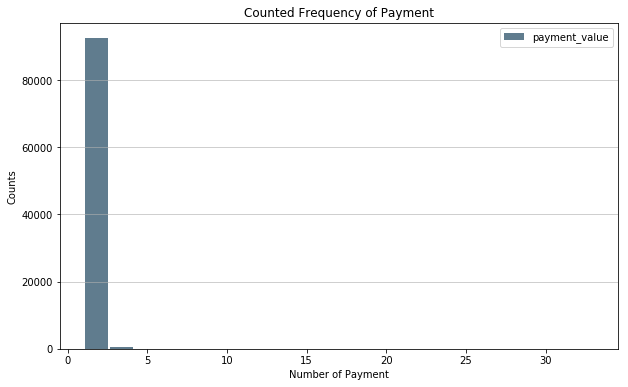

In [33]:
customer_count.plot.hist(grid=False, bins=20, rwidth=0.9,
                   color='#607c8e', figsize=(10, 6))
plt.title('Counted Frequency of Payment')
plt.xlabel('Number of Payment')
plt.ylabel('Counts')
plt.grid(axis='y', alpha=0.75)

In [16]:
customer_count.describe()

,payment_value
count,93341.000000
mean,1.079258
std,0.449146
min,1.000000
25%,1.000000
50%,1.000000
75%,1.000000
max,33.000000


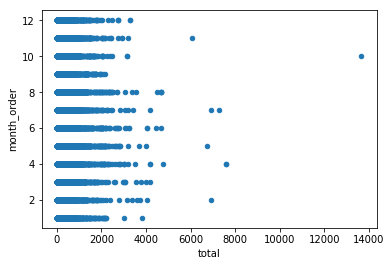

In [128]:
all_data1.plot('total', 'month_order', kind = 'scatter');

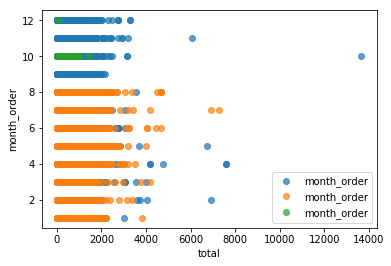

In [145]:
customers_pay = all_data1['year_order'].unique()
for year_order in customers_pay:
    plt.plot(all_data1.loc[all_data1.year_order==year_order,'total'], 
             all_data1.loc[all_data1.year_order==year_order,'month_order'], 
             linestyle='',
             marker='o',
             alpha=.7)
plt.xlabel('total')
plt.ylabel('month_order')
plt.legend(numpoints=1)

C:\Users\vagne\Anaconda3\lib\site-packages\IPython\core\interactiveshell.py:3296: UserWarning: To output multiple subplots, the figure containing the passed axes is being cleared
  exec(code_obj, self.user_global_ns, self.user_ns)


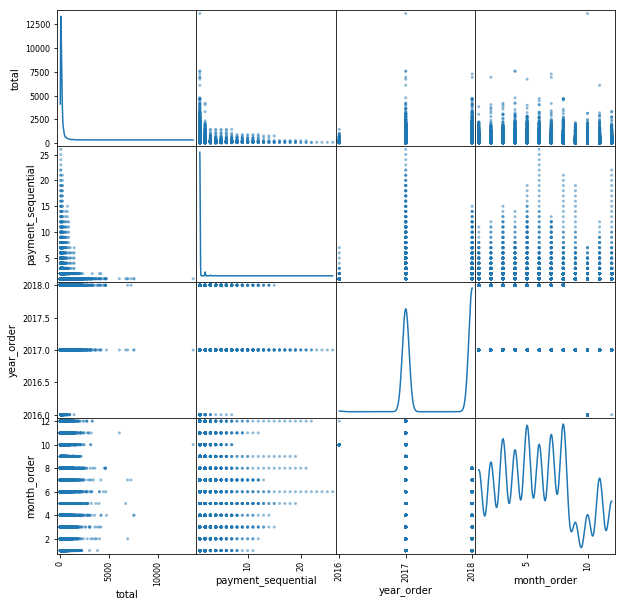

In [123]:
numeric_vars =['total', 'payment_sequential', 'year_order', 'month_order', 'customer_unique_id']
from pandas.plotting import scatter_matrix
fig, ax = plt.subplots(1, 1, figsize=(10, 10))
ax = scatter_matrix(all_data1[numeric_vars], ax=ax, diagonal='kde')

year_order  month_order
2016        10             AxesSubplot(0.125,0.125;0.775x0.755)
            12             AxesSubplot(0.125,0.125;0.775x0.755)
2017        1              AxesSubplot(0.125,0.125;0.775x0.755)
            2              AxesSubplot(0.125,0.125;0.775x0.755)
            3              AxesSubplot(0.125,0.125;0.775x0.755)
            4              AxesSubplot(0.125,0.125;0.775x0.755)
            5              AxesSubplot(0.125,0.125;0.775x0.755)
            6              AxesSubplot(0.125,0.125;0.775x0.755)
            7              AxesSubplot(0.125,0.125;0.775x0.755)
            8              AxesSubplot(0.125,0.125;0.775x0.755)
            9              AxesSubplot(0.125,0.125;0.775x0.755)
            10             AxesSubplot(0.125,0.125;0.775x0.755)
            11             AxesSubplot(0.125,0.125;0.775x0.755)
            12             AxesSubplot(0.125,0.125;0.775x0.755)
2018        1              AxesSubplot(0.125,0.125;0.775x0.755)
            2   

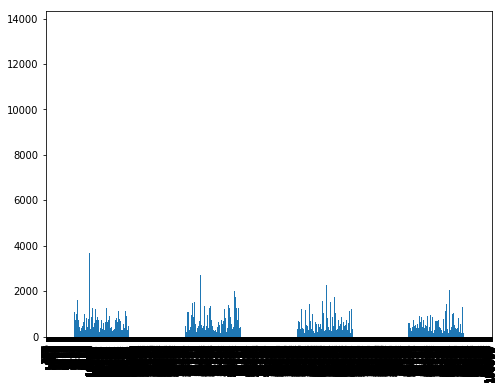

In [147]:
all_data1.groupby(['year_order', 'month_order'] )['total'].plot.bar(figsize=(8, 6))

In [17]:
avg_month = all_data1.groupby(['month_order','year_order']).mean()['payment_value'].reset_index()
avg_month = avg_month.rename(columns = {'payment_value' : 'avg_pay'})
avg_month

,month_order,year_order,avg_pay
0,1,2017,159.826474
1,1,2018,147.133829
2,2,2017,156.085977
3,2,2018,141.911060
4,3,2017,151.688737
5,3,2018,153.477092
6,4,2017,160.891593
7,4,2018,160.928960
8,5,2017,149.974480
9,5,2018,160.338845


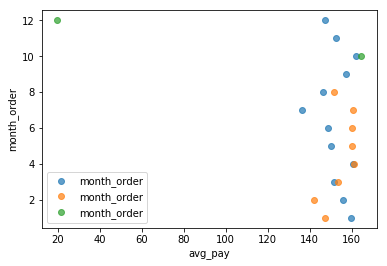

In [31]:
customers_pay = avg_month['year_order'].unique()
for year_order in customers_pay:
    plt.plot(avg_month.loc[avg_month.year_order==year_order,'avg_pay'], 
             avg_month.loc[avg_month.year_order==year_order,'month_order'], 
             linestyle='',
             marker='o',
             alpha=.7)
plt.xlabel('avg_pay')
plt.ylabel('month_order')
plt.legend(numpoints=1)

year_order
2016    AxesSubplot(0.125,0.125;0.775x0.755)
2017    AxesSubplot(0.125,0.125;0.775x0.755)
2018    AxesSubplot(0.125,0.125;0.775x0.755)
Name: avg_pay, dtype: object

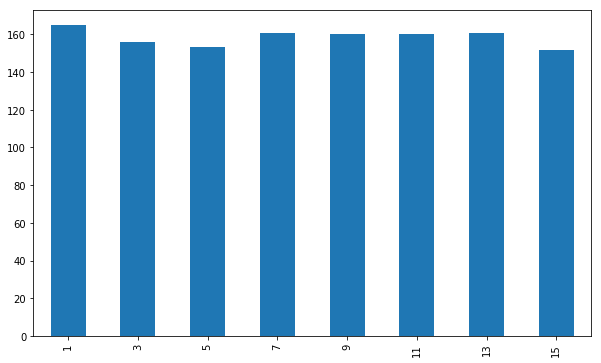

In [21]:
avg_month.groupby(['year_order' ] )['avg_pay'].plot.bar(figsize=(10, 6))

In [ ]:
g = sns.catplot(x="country",y= 'comment_count',kind='bar',data = all_data1)
g.set(yscale="log")
g.add_legend(title = "Country vs Comment count")
g.fig.set_size_inches(17, 10)    